In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
    
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'D:\ds project\Random forest\WineQT.csv')


In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


In [4]:
data.head(5)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [5]:
data.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595
1142,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1597


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [7]:
# classes of target value-quality

In [8]:
set(data.quality) # Quality of data set 

{3, 4, 5, 6, 7, 8}

In [9]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [10]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

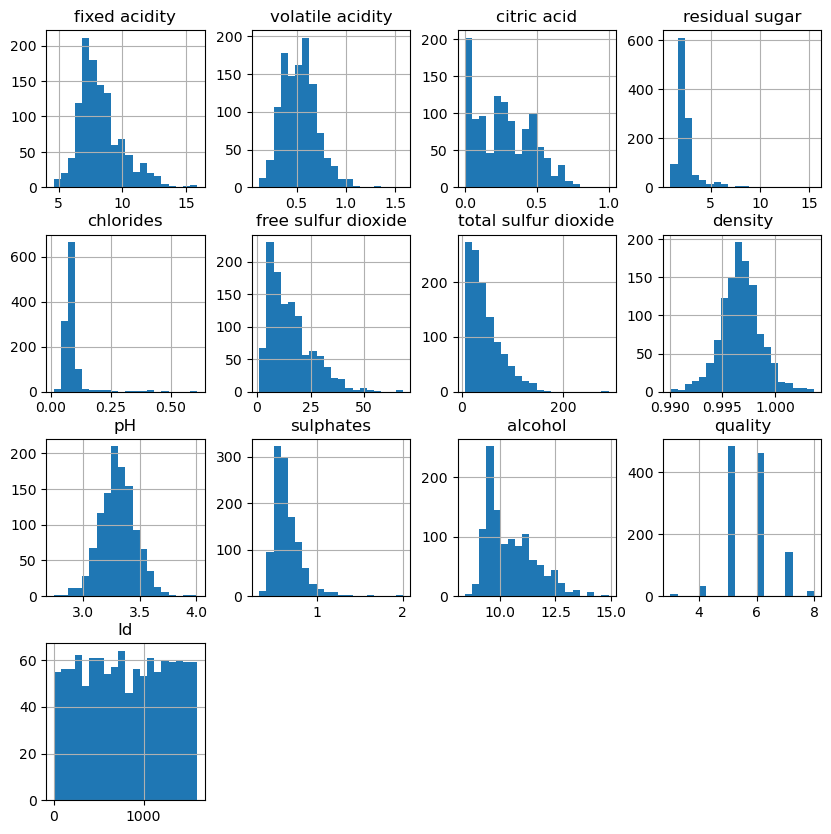

In [11]:
data.hist(bins=20, figsize=(10,10))
plt.show()

In [12]:
# correlation matrix among all features inside the data set

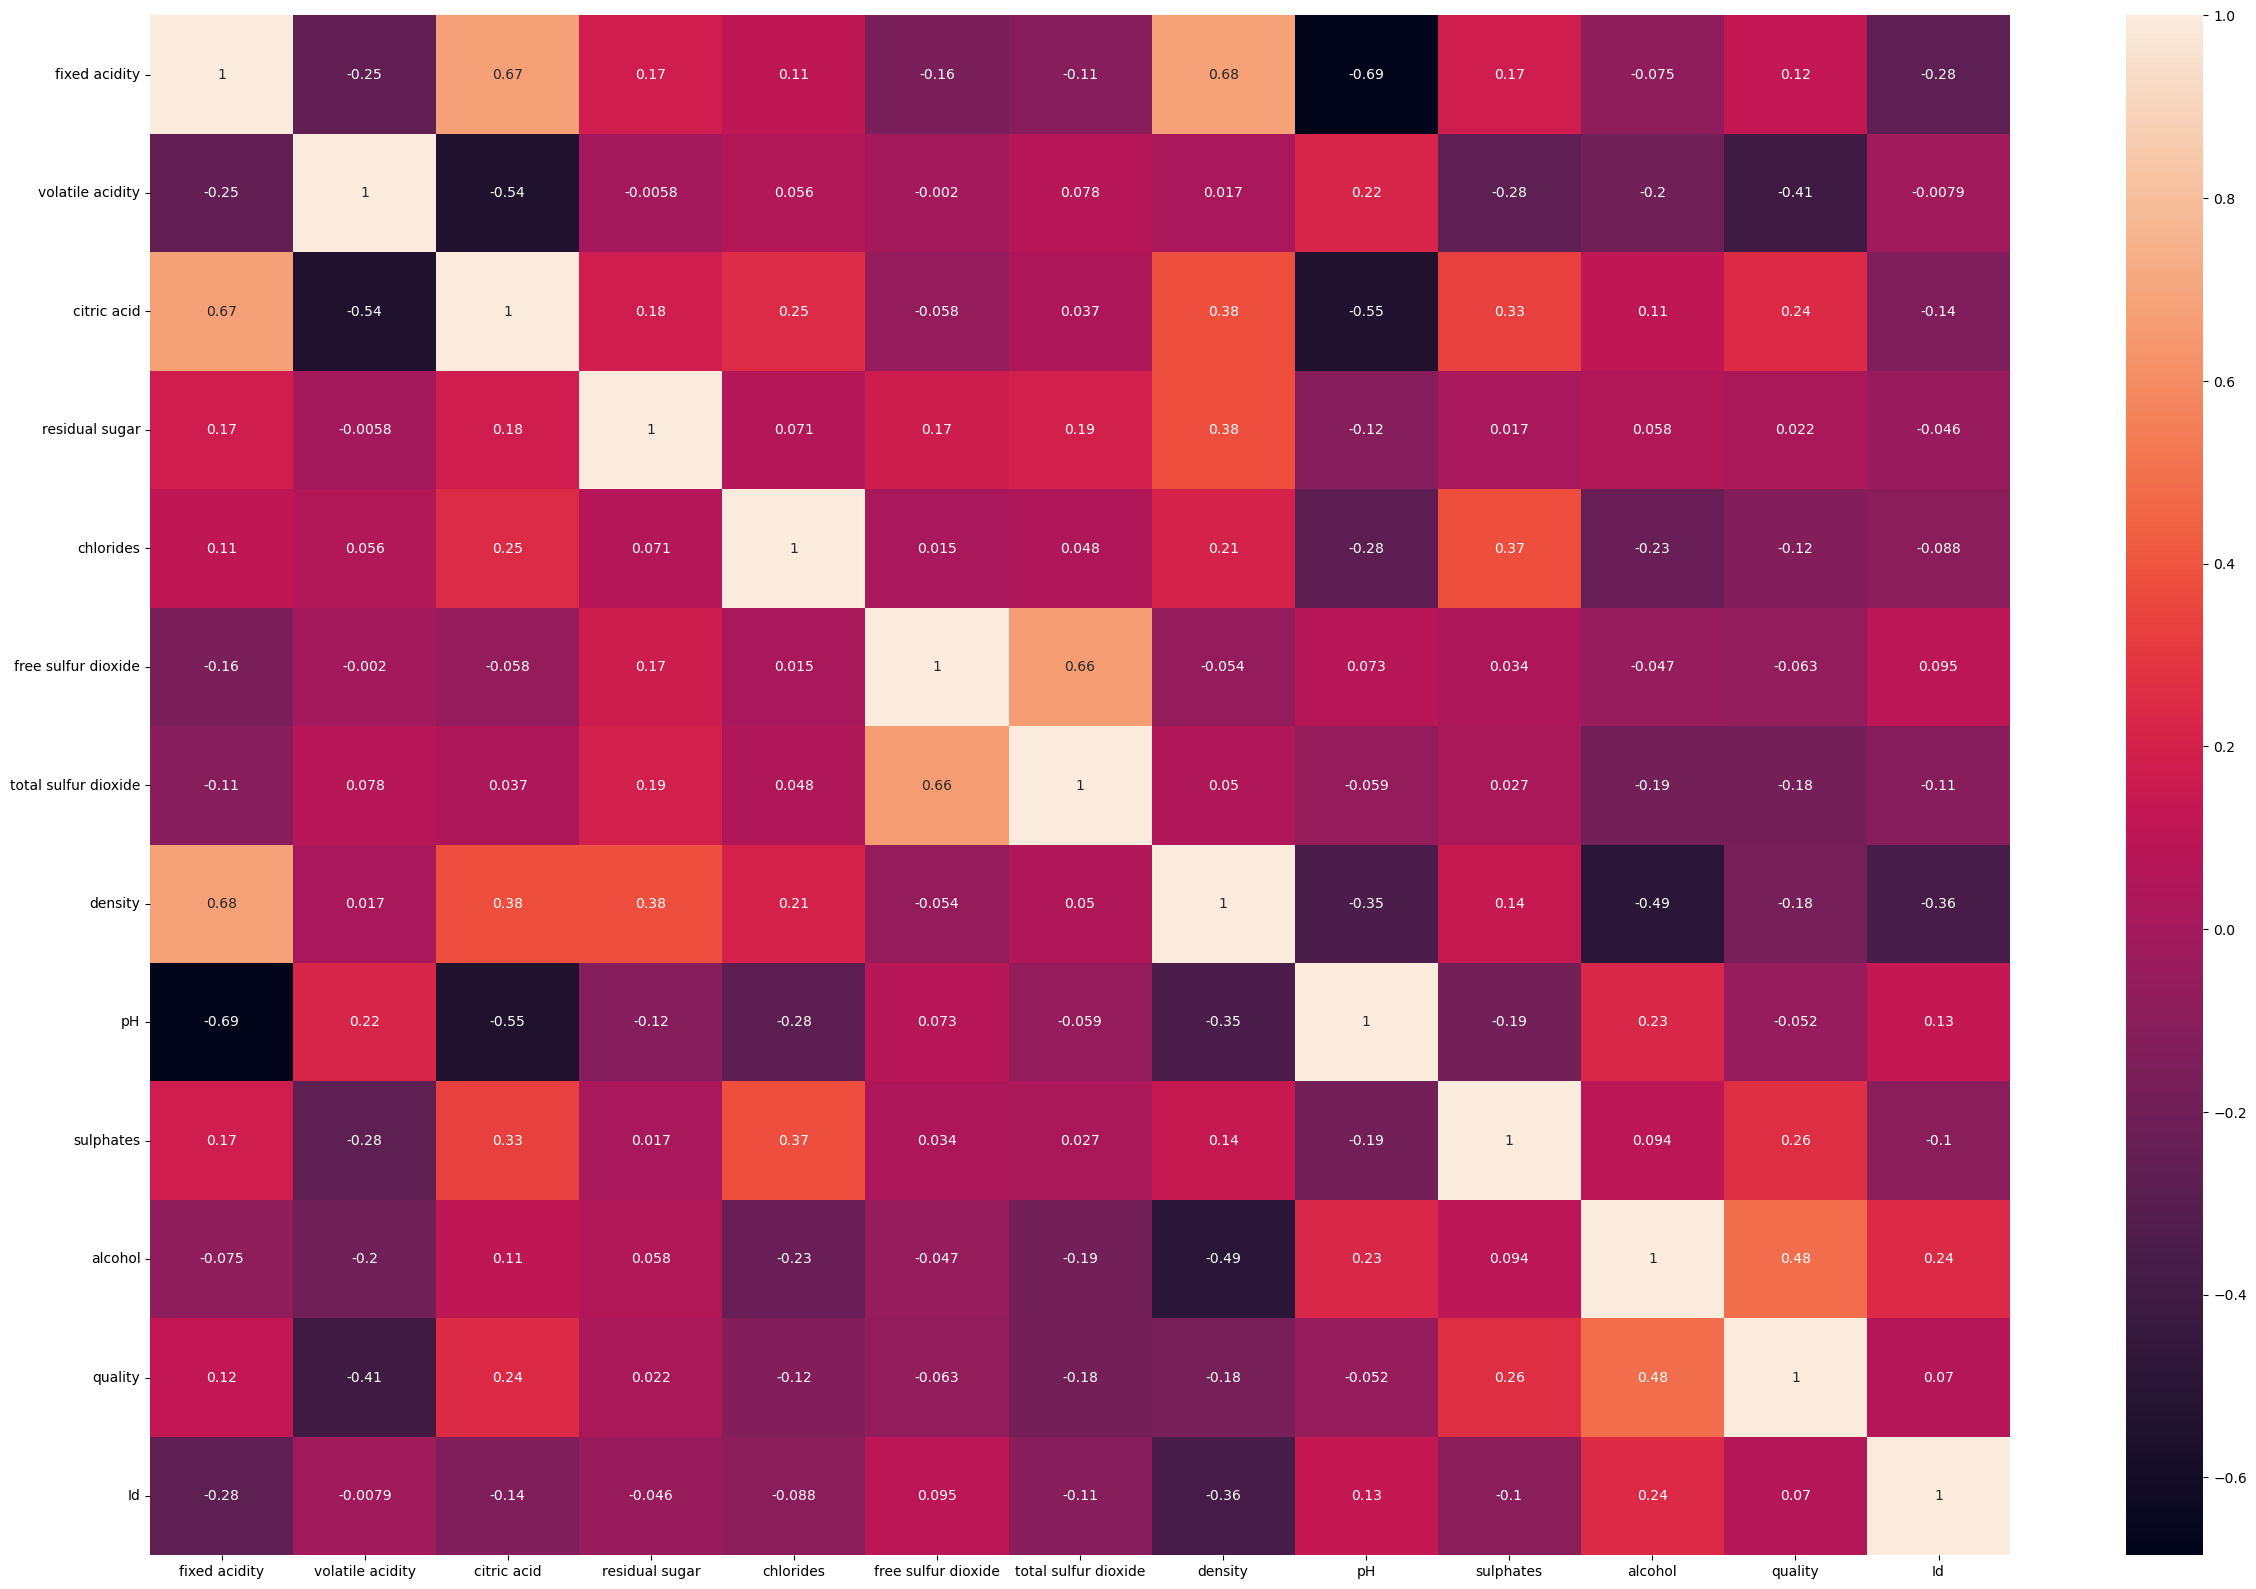

In [13]:

import matplotlib.pyplot as plt

plt.figure(figsize=(30, 20))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

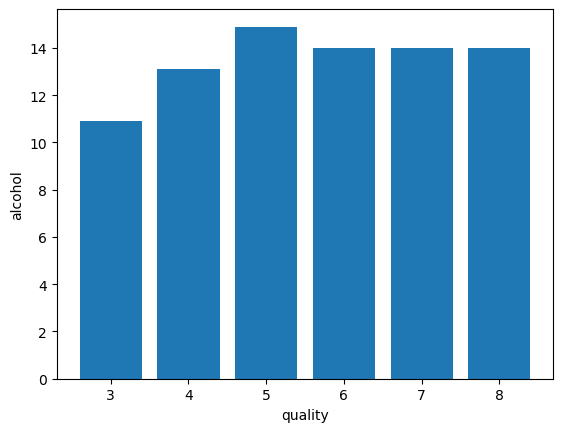

In [14]:
plt.bar(data['quality'], data['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

In [15]:
# Detection of outliers using z-score

In [16]:
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          0.521580          0.939332     1.365027        0.466421   0.231395   
1          0.292593          1.941813     1.365027        0.050060   0.234247   
2          0.292593          1.273492     1.161568        0.171289   0.107253   
3          1.653789          1.399789     1.483400        0.466421   0.252560   
4          0.521580          0.939332     1.365027        0.466421   0.231395   
...             ...               ...          ...             ...        ...   
1138       1.151292          0.118842     0.703785        0.171289   0.231395   
1139       0.865059          0.493785     0.958109        0.466421   0.400719   
1140       1.208538          0.382399     0.958109        0.392638   0.064922   
1141       1.380278          0.103932     0.856379        0.245072   0.527712   
1142       1.380278          0.633019     0.754650        0.392638   0.252560   

      free sulfur dioxide  

In [37]:
# z>3(threshold)= This is outlier

In [38]:
print(np.where(z>3))

(array([  11,   13,   30,   31,   32,   59,   61,   64,   75,   75,   87,
         88,   96,   98,  103,  103,  103,  103,  114,  115,  129,  142,
        161,  161,  167,  170,  171,  182,  182,  200,  230,  231,  240,
        244,  249,  272,  275,  275,  278,  278,  287,  289,  311,  311,
        324,  329,  339,  339,  348,  366,  368,  388,  397,  397,  399,
        399,  407,  419,  421,  424,  430,  452,  453,  454,  460,  460,
        462,  462,  462,  485,  490,  490,  493,  514,  520,  538,  557,
        572,  589,  597,  598,  627,  627,  644,  648,  654,  655,  690,
        714,  738,  738,  756,  760,  760,  761,  761,  787,  831,  871,
        890,  898,  898,  914,  915,  919,  922,  922,  931,  933,  934,
        934,  935,  965,  971,  973,  973,  975,  975, 1022, 1022, 1022,
       1046, 1051, 1051, 1053, 1053, 1055, 1066, 1074, 1111, 1111, 1111,
       1122], dtype=int64), array([ 9,  4,  4,  9,  8,  9,  9,  9,  4,  9,  1,  1, 10, 10,  2,  4,  8,
        9,  3,  3,  

In [39]:
# remove those records whose z>3(outlier)

In [40]:
new_data = data[(z<3).all(axis=1)]

In [41]:
new_data.shape

(1041, 13)

In [42]:
data.shape

(1143, 13)

In [43]:
# Data spliting into features(x) and target column(y)

In [46]:
from sklearn.model_selection import train_test_split
# X - input feature
# Y - outcome
x = new_data.drop(columns = 'quality')
y = new_data['quality']

In [47]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,Id,best quality
0,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,0.9968,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,0.9970,3.26,0.65,9.8,2,0
3,11.2,0.28,0.56,1.9,0.075,17.0,0.9980,3.16,0.58,9.8,3,1
4,7.4,0.70,0.00,1.9,0.076,11.0,0.9978,3.51,0.56,9.4,4,0


In [48]:
y

0       5
1       5
2       5
3       6
4       5
       ..
1138    6
1139    6
1140    5
1141    6
1142    5
Name: quality, Length: 1041, dtype: int64

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2)

# DAta modeling using RFC

In [53]:
from sklearn.ensemble import RandomForestClassifier
rf_classificationMode1 = RandomForestClassifier(n_estimators = 100)

In [54]:
rf_classificationMode1.fit(x_train, y_train)

RandomForestClassifier()

# prediction of data using random forest model

In [55]:
y_pred =rf_classificationMode1.predict(x_test)

In [56]:
y_pred

array([5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 7, 7, 5, 5, 5, 6, 6,
       5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 6,
       5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 6, 5, 6, 6,
       6, 6, 6, 5, 5, 6, 7, 6, 6, 5, 7, 5, 6, 5, 6, 5, 5, 6, 5, 7, 5, 5,
       6, 5, 6, 7, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 6,
       5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 7,
       6, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6,
       6, 6, 5, 5, 6, 5, 7, 6, 5, 5, 6, 5, 5, 6, 7, 6, 6, 5, 5, 7, 5, 6,
       6, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 7, 5, 6, 7, 6, 5, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 6], dtype=int64)

In [57]:
# data evalution on matrix

In [62]:
from sklearn import metrics
print('Accuracy Score', metrics.accuracy_score(y_test, y_pred))

Accuracy Score 0.8660287081339713


In [63]:
#accuracy score= 86.60

# Hyperparameter Tunning with Gridsearch



[Text(0.4837666495901639, 0.96875, 'x[9] <= 10.25\ngini = 0.647\nsamples = 526\nvalue = [23, 348, 329, 119, 13]'),
 Text(0.2576203893442623, 0.90625, 'x[8] <= 0.575\ngini = 0.514\nsamples = 268\nvalue = [10, 268, 131, 16, 4]'),
 Text(0.10092213114754098, 0.84375, 'x[10] <= 9.0\ngini = 0.365\nsamples = 123\nvalue = [4, 161, 39, 4, 0]'),
 Text(0.07172131147540983, 0.78125, 'x[1] <= 0.655\ngini = 0.49\nsamples = 3\nvalue = [0, 3, 0, 4, 0]'),
 Text(0.06352459016393443, 0.71875, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 4, 0]'),
 Text(0.07991803278688525, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 3, 0, 0, 0]'),
 Text(0.13012295081967212, 0.78125, 'x[5] <= 24.5\ngini = 0.344\nsamples = 120\nvalue = [4, 158, 39, 0, 0]'),
 Text(0.09631147540983606, 0.71875, 'x[9] <= 9.75\ngini = 0.389\nsamples = 98\nvalue = [4, 124, 38, 0, 0]'),
 Text(0.06967213114754098, 0.65625, 'x[3] <= 2.25\ngini = 0.292\nsamples = 62\nvalue = [4, 88, 14, 0, 0]'),
 Text(0.040983606557377046, 0.59375, 'x[5] <= 4.5\ng

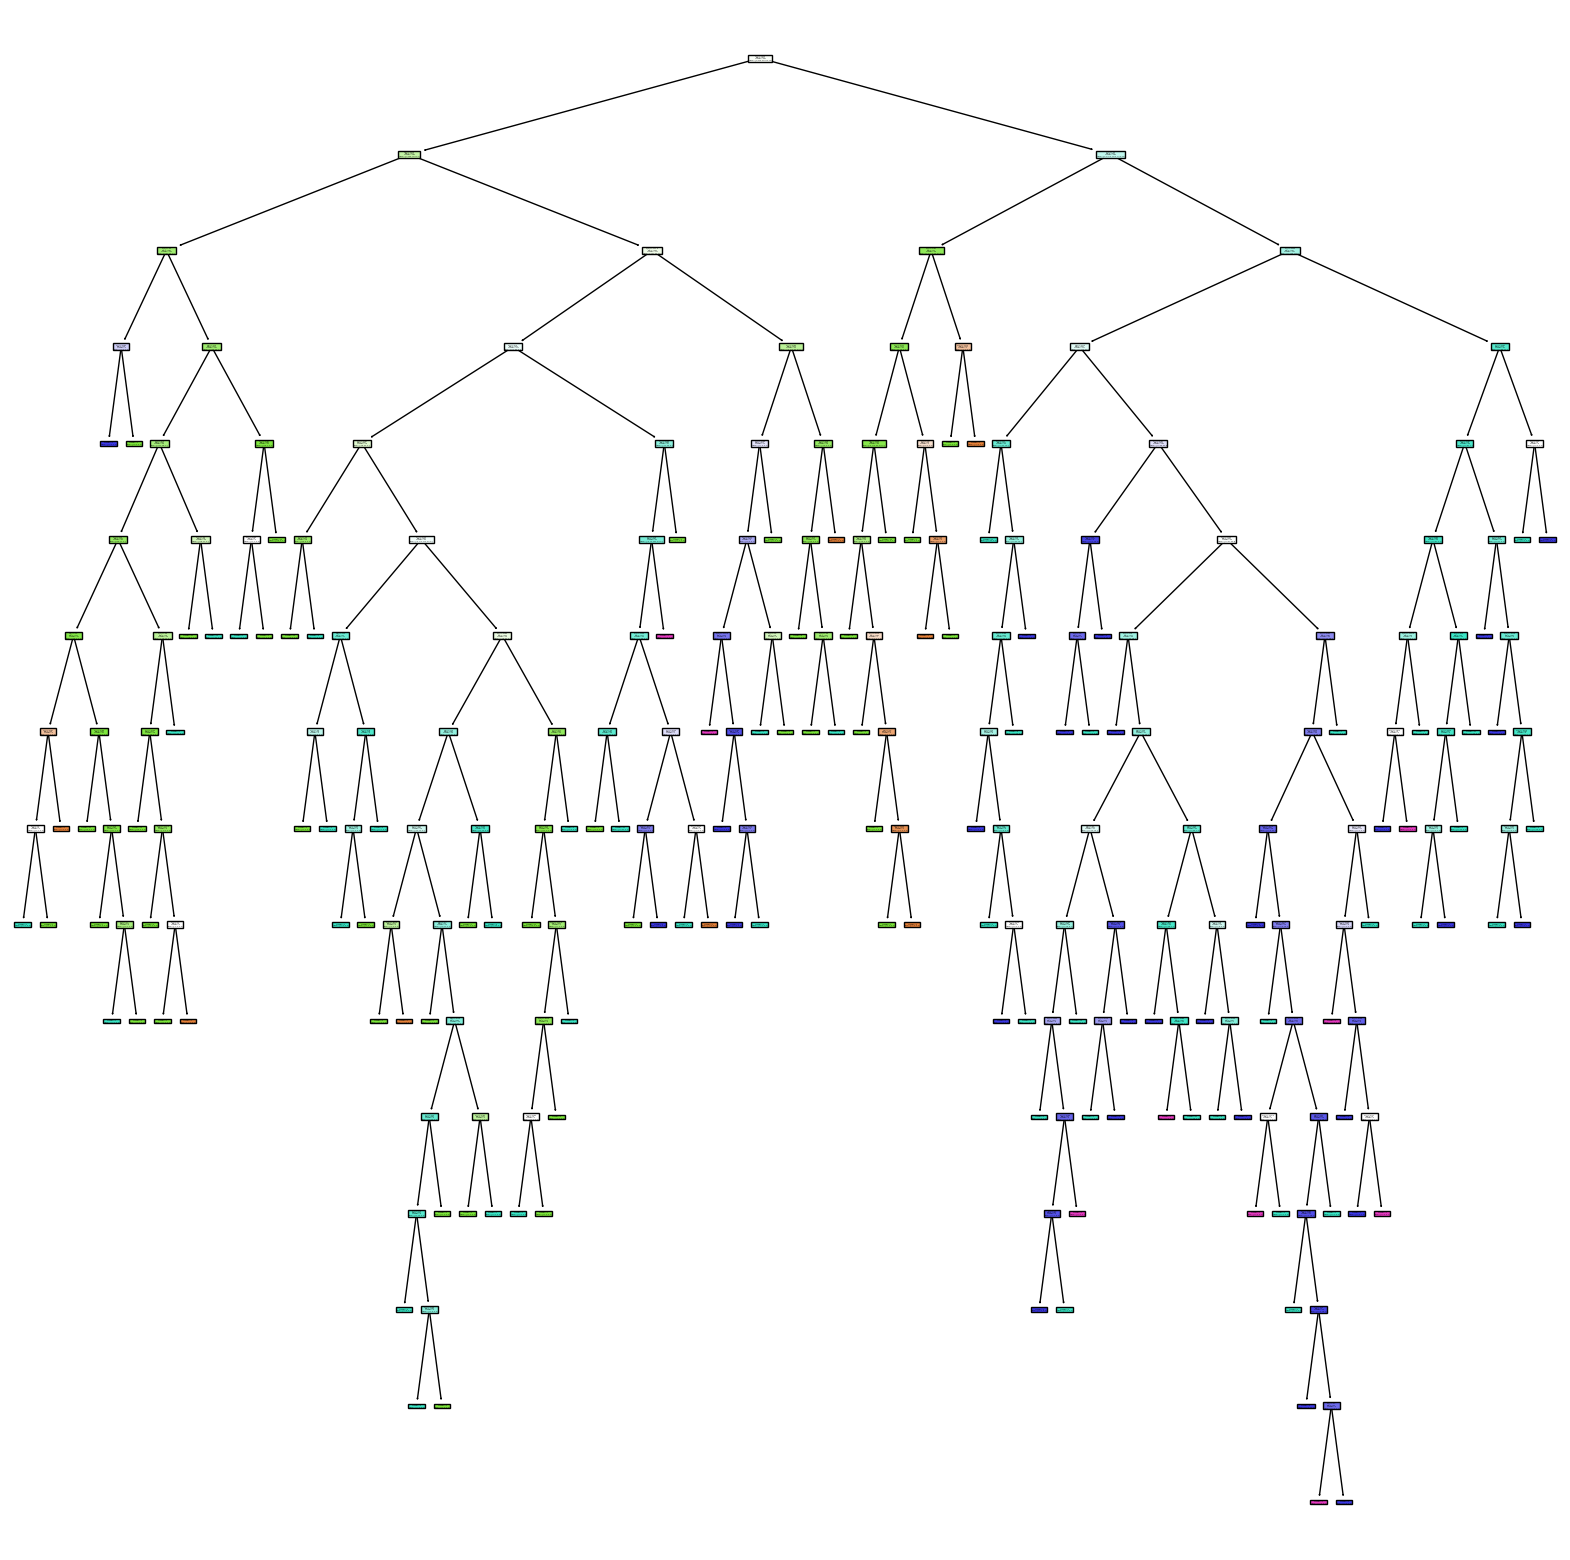

In [72]:
plt.figure(figsize=(20,20))
from sklearn import tree
tree.plot_tree(rf_classificationMode1.estimators_[0],filled=True)

 
    
    

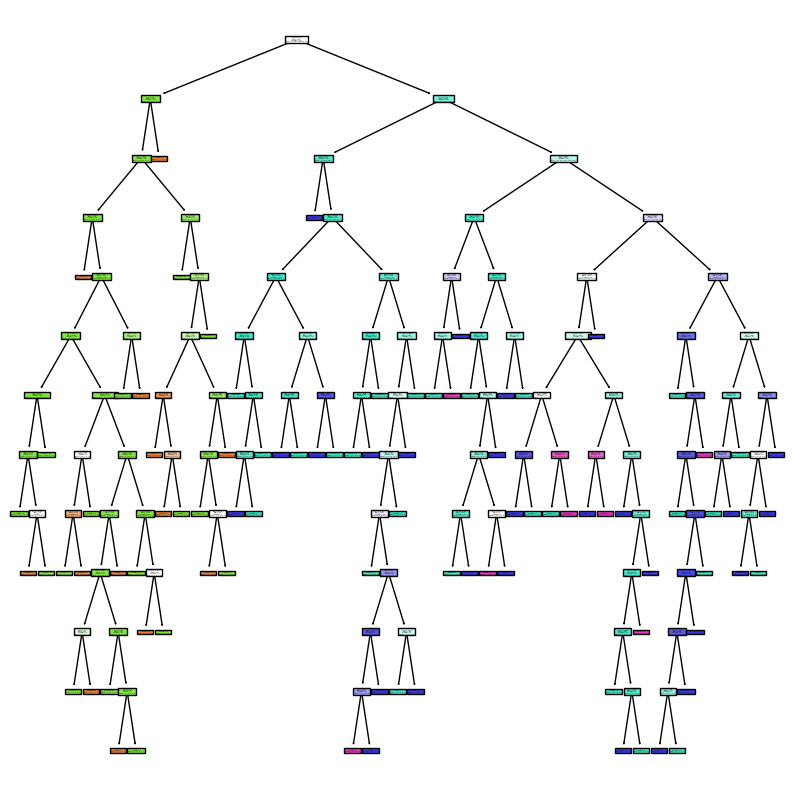

In [74]:
plt.figure(figsize=(10,10))
for i in range(len(rf_classificationMode1.estimators_)):
    tree.plot_tree(rf_classificationMode1.estimators_[i],filled=True)
